In [1]:
import sys
sys.executable

'/Library/Developer/CommandLineTools/usr/bin/python3'

In [2]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install smote_variants

In [3]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install imblearn

In [4]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression


In [5]:
import smote_variants as sv

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


2022-06-29 23:45:50,817:DEBUG:matplotlib data path: /Users/madhuri/Library/Python/3.8/lib/python/site-packages/matplotlib/mpl-data
2022-06-29 23:45:50,820:DEBUG:CONFIGDIR=/Users/madhuri/.matplotlib
2022-06-29 23:45:50,821:DEBUG:interactive is False
2022-06-29 23:45:50,821:DEBUG:platform is darwin
2022-06-29 23:45:50,821:DEBUG:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings.cp437', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'iter

2022-06-29 23:45:50,881:DEBUG:CACHEDIR=/Users/madhuri/.matplotlib
2022-06-29 23:45:50,883:DEBUG:Using fontManager instance from /Users/madhuri/.matplotlib/fontlist-v330.json
2022-06-29 23:45:51,126:DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-06-29 23:45:51,127:DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [8]:
dataframe1 = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/ClinicalDF1.csv')

In [9]:
dataframe=dataframe1[['Morphology','AgeAtDiagnosis','Gender','CancerType']]

In [10]:
dataframe=dataframe.dropna()

In [11]:
dataframe.shape

(6718, 4)

In [20]:
import matplotlib.pyplot as plt

In [23]:
import missingno as msno
#%matplotlib inline
#msno.matrix(clinical_data)

In [25]:
#msno.heatmap(dataframe)

In [27]:
import seaborn as sns

In [28]:
sns.heatmap(dataframe)

ValueError: could not convert string to float: '8120/3'

In [11]:
X= dataframe.iloc[:, :-1]
y=dataframe['CancerType']



In [13]:
dataframe.head()

,Morphology,AgeAtDiagnosis,Gender,CancerType
0,8120/3,27730.0,male,Bladder
1,8120/3,28106.0,male,Bladder
2,8120/3,26546.0,male,Bladder
3,8120/3,20424.0,male,Bladder
4,8120/3,25317.0,male,Bladder


In [14]:
dataframe.shape

(6718, 4)

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 6801
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Morphology      6718 non-null   object 
 1   AgeAtDiagnosis  6718 non-null   float64
 2   Gender          6718 non-null   object 
 3   CancerType      6718 non-null   object 
dtypes: float64(1), object(3)
memory usage: 262.4+ KB


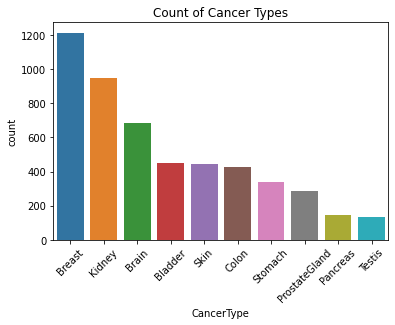

In [193]:
sns.countplot(x = 'CancerType',
              data = dataframe,
              order = dataframe['CancerType'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Cancer Types")
plt.savefig('count.png')
plt.show()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=10) 

In [17]:
numerical_ix= X.select_dtypes(include=['int64','float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns


In [18]:
from sklearn.preprocessing import MinMaxScaler
#one hot encoding categorical predictors
t=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform=ColumnTransformer(transformers=t)
X_transform=col_transform.fit_transform(X_train)

In [19]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0) 

In [20]:
X_train.shape


(4702, 3)

In [21]:
from sklearn.preprocessing import StandardScaler
#ct = ColumnTransformer([(pd.DataFrame('X_train'), StandardScaler(), ['AgeAtDiagnosis'])], remainder ='passthrough')
#ct=StandardScaler()
# c= [('num', StandardScaler(), numerical_ix)]
# col_t=ColumnTransformer(transformers=c, remainder="passthrough")
#X_t=col_t.fit_transform(X_train)
# X_train_scaled = ct.fit_transform(X_train)
# X_test_scaled = ct.transform(X_test)

In [22]:
# col_scale=['AgeAtDiagnosis']
# scaler=StandardScaler()
# X_tr=scaler.fit_transform[col_scale]

In [23]:
# scaler = preprocessing.StandardScaler().fit(X_train['AgeAtDiagnosis'])
# Age_scaled = scaler.transform(X_train['AgeAtDiagnosis'])

In [24]:

X_test=col_transform.transform(X_test)

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


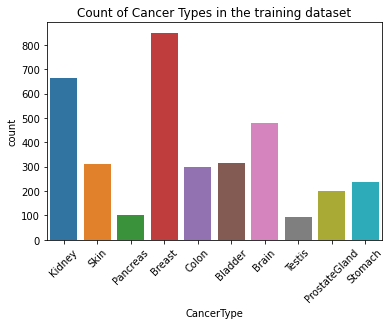

In [203]:
sns.countplot(y_train)
plt.xticks(rotation=45)
plt.title("Count of Cancer Types in the training dataset")
plt.savefig('tr_count.png')
plt.show()


In [39]:
#one hot encoding categorical predictors
# enc = OneHotEncoder(handle_unknown = 'ignore')
# enc.fit_transform(X[categorical_ix]).toarray()
# # enc.transform(train).toarray()


# enc.transform(test).toarray()

In [25]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc= le.transform(y_train)
y_test_enc=le.transform(y_test)

In [26]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_samp, y_samp = resample.fit_resample(X_transform, y_train_enc)


/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


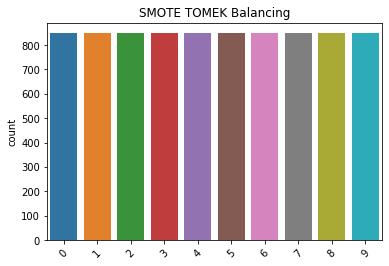

In [211]:

sns.countplot(y_samp)
plt.xticks(rotation=45)
plt.title("SMOTE TOMEK Balancing")
#plt.savefig("smt.png")
plt.show()

In [27]:
# le = LabelEncoder()
# le.fit(y_train)
# y_enc= le.transform(y_train)
# y_test=le.transform(y_test)

In [28]:
y_test

2972     Breast
660       Colon
266     Bladder
5052     Kidney
4850     Kidney
         ...   
786       Colon
3617     Breast
5086     Kidney
3144     Breast
596       Colon
Name: CancerType, Length: 2016, dtype: object

In [30]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 200)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)              # n_repeats=10 made no difference

In [31]:
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_samp, y_samp, scoring='accuracy', cv=cv, n_jobs=-1)

In [32]:
#  model performance
print('Mean Accuracy: %.3f' % (mean(n_scores)))

Mean Accuracy: 0.857


In [33]:
model.fit(X_samp,y_samp)

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', solver='sag')

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([5, 6, 0, ..., 4, 5, 3])

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test_enc,y_pred)

array([[145,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 225,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 399,   4,   0,  34,   0,   0,   0,   1],
       [  0,   0,   0, 139,   0,   0,  63,   0,   0,   0],
       [  0,   0,   0,   0, 433,   0,   0,   0,   0,   0],
       [  0,   0,  17,   3,   0,  34,   2,   0,   0,   0],
       [  0,   0,   0,   3,   0,   1, 191,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 137,   3,   0],
       [  0,   0,   0,  25,   4,   1,  28,   0,  78,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  43]])

In [38]:
from sklearn import metrics
from sklearn.metrics import *

In [39]:
print(metrics.classification_report(y_test_enc, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.993     0.997       146
           1      0.996     1.000     0.998       225
           2      0.959     0.909     0.933       439
           3      0.799     0.688     0.739       202
           4      0.989     1.000     0.994       433
           5      0.486     0.607     0.540        56
           6      0.673     0.979     0.797       195
           7      1.000     0.979     0.989       140
           8      0.951     0.574     0.716       136
           9      0.977     0.977     0.977        44

    accuracy                          0.905      2016
   macro avg      0.883     0.871     0.868      2016
weighted avg      0.918     0.905     0.905      2016



In [40]:
f1_score(y_test_enc, y_pred, average='macro')

0.8680516839429412

In [41]:
metrics.accuracy_score(y_test_enc,y_pred)*100

90.47619047619048

In [42]:
#probability score
y_score=model.predict_proba(X_test)

In [43]:
# roc curve
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
Y = label_binarize(y, classes=[0,1, 2, 3,4,5,6,7,8,9])
fpr = dict()
tpr = dict()

for i in range(10):   #10 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_enc[i],
                                  y_score[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))


             
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

TypeError: Singleton array 2 cannot be considered a valid collection.

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/Library/Python/